# **1. Load Titanic Dataset**

Reference: https://www.kaggle.com/code

In [ ]:
!pip install --upgrade scikit-learn==1.0.2
!pip install --upgrade numpy==1.21.5

**Source** : https://www.kaggle.com/c/titanic/data

## **Data Dictionary**  

| Variable | Definition | Key |
|-:|-:|-|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |  |
| Age | Age in years |  |
| sibsp | # of siblings / spouses aboard the Titanic |  |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number |  |
| fare | Passenger fare |  |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

## **Variable Notes**  

**pclass**: A proxy for socio-economic status (SES)|
* 1st = Upper  
* 2nd = Middle  
* 3rd = Lower  


**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...  
* Sibling = brother, sister, stepbrother, stepsister  
* Spouse = husband, wife (mistresses and fiancés were ignored)  

**parch**: The dataset defines family relations in this way...  
* Parent = mother, father  
* Child = daughter, son, stepdaughter, stepson  
* Some children travelled only with a nanny, therefore parch=0 for them.  

In [ ]:
import time
import datetime

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split

titanic_df = pd.read_csv('https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/Titanic.csv')

#Get Dummies (pandas)
from sklearn.preprocessing import LabelEncoder
convert_sex = LabelEncoder()
titanic_df['Sex'] = convert_sex.fit_transform(titanic_df['Sex']) # 0:female 1:male

feature_col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_col = 'Survived'

train_df, test_df = train_test_split(titanic_df, test_size=0.3, random_state=0, stratify=titanic_df[target_col])
train_df, test_df = train_df.copy(), test_df.copy()

# Fill NA 'Age' with Median
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
test_df['Age'].fillna(train_df['Age'].median(), inplace = True)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


# **2. Support Vector Machine**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC

**Suggest Parameters**  

* **C**: 1  
* **kernel**: rbf  
* **gamma**: auto  

In [ ]:
C = 1 #@param {type:"slider", min:1.0, max:3.0, step:0.1}
kernel = "rbf" #@param ['linear', 'poly', 'rbf']
gamma = "auto"  #@param ['scale', 'auto']

svm = SVC(
  C=C,
  kernel=kernel,
  gamma=gamma,
  cache_size=4096,
  random_state=0
)

svm_start_time = time.time()
# Training you tree
svm.fit(train_df[feature_col], train_df[target_col])
svm_end_time = time.time()
print(f"Training Time: {datetime.timedelta(seconds=svm_end_time-svm_start_time)}")

Training Time: 0:00:00.113516


In [ ]:
# Predict as Class
train_predict = svm.predict(train_df[feature_col])
test_predict = svm.predict(test_df[feature_col])

In [ ]:
# Show first 10 prediction
print(train_predict[:10])

[0 0 0 1 0 1 0 1 0 1]


In [ ]:
# Actual Target
train_df[target_col][:10]

231    0
836    0
639    0
389    1
597    0
20     0
179    0
183    1
38     0
692    1
Name: Survived, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_df[target_col], test_predict, labels=[1, 0])

array([[ 52,  51],
       [ 28, 137]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_df[target_col], test_predict,digits=4))

              precision    recall  f1-score   support

           0     0.7287    0.8303    0.7762       165
           1     0.6500    0.5049    0.5683       103

    accuracy                         0.7052       268
   macro avg     0.6894    0.6676    0.6723       268
weighted avg     0.6985    0.7052    0.6963       268



# **3.Visualization**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


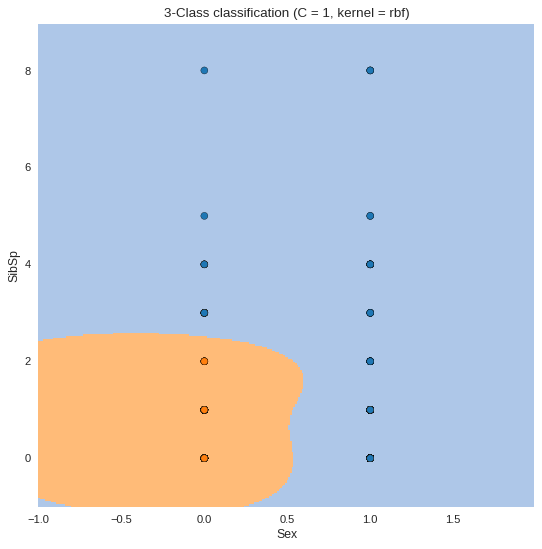

In [ ]:
#@markdown # **Select parameters to plot**
#@markdown **(On simplyfied model for visualization - 2 variables)**

#@markdown Adapt from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
#@markdown **Suggest Parameters**  
#@markdown * **x_label**: Sex  
#@markdown * **y_label**: SibSp  
#@markdown Try on Different kernels to see hyperplanes.
C = 1
kernel = "rbf" #@param ['linear', 'poly', 'rbf']
gamma = "scale"

# x_label = 'sepal length (cm)' #@param ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# y_label = 'petal length (cm)' #@param ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x_label = 'Sex' #@param ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
y_label = 'SibSp' #@param ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

x_idx = train_df.columns.to_list().index(x_label)
y_idx = train_df.columns.to_list().index(y_label)

# Script from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

from matplotlib import cm
from matplotlib.colors import ListedColormap
cmap_val = np.linspace(0.0, 1.0, 20)
cmap_light = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[1:5:2])
cmap_bold = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[:4:2])
h = 300  # step size in the mesh

model = SVC(
  C=C,
  kernel=kernel,
  gamma=gamma,
  cache_size=4096
)
model.fit(train_df.iloc[:, [x_idx, y_idx]], train_df[target_col])
x_min, x_max = train_df.iloc[:, x_idx].min() - 1, train_df.iloc[:, x_idx].max() + 1
y_min, y_max = train_df.iloc[:, y_idx].min() - 1, train_df.iloc[:, y_idx].max() + 1
xx, yy = np.meshgrid(
  np.arange(x_min, x_max, (x_max-x_min)/h),
  np.arange(y_min, y_max, (y_max-y_min)/h)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(
  train_df.iloc[:, x_idx],
  train_df.iloc[:, y_idx],
  c=train_df[target_col],
  cmap=cmap_bold,
  edgecolor='k',
  s=40
)
plt.xlabel(x_label)
plt.xlim(xx.min(), xx.max())
plt.ylabel(y_label)
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (C = {C}, kernel = {kernel})")
plt.show()

## 3.1 Support Vectors

In [ ]:
# Index of support vectors
svm.support_[:5]

array([2, 4, 5, 6, 8], dtype=int32)

In [ ]:
# Alpha of Support Vector
svm.dual_coef_[0][:5]

array([-1.        , -1.        , -1.        , -0.88025532, -0.40586975])

In [ ]:
# Support Vector
svm.support_vectors_[:5]

array([[ 3.  ,  1.  , 28.75,  1.  ,  0.  , 16.1 ],
       [ 3.  ,  1.  , 49.  ,  0.  ,  0.  ,  0.  ],
       [ 2.  ,  1.  , 35.  ,  0.  ,  0.  , 26.  ],
       [ 3.  ,  1.  , 36.  ,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  0.  , 18.  ,  2.  ,  0.  , 18.  ]])